In [1]:
########################################
# Import Data
########################################
import pandas as pd

"""
If we want to work on data from first set instead of the whole exercise, use 'set1.csv' instead of 'data.csv' argument.
"""

#Import Data from whole exercise
df = pd.read_csv('set1.csv', sep=',', header=0)
#clean dataframes
df = df.rename(columns=lambda x: x.strip())
df = df.dropna()
df

Whole exercise dataset:


,ID,GROUPE,MUSCLE,SWE_perc,SWE_raw,SWE_dist,ACTIVATION,LRELATIVE,LRELATIVE_pic,F_V,ForceRelative,ForceRelative_pic,ChargeInterne
0,1,NHE,SM,0.0,-0.1,0.00,0.374994,0.624676,0.956367,1.081885,0.269380,0.475925,0.274599
1,2,NHE,SM,6.0,2.0,0.18,0.593258,0.611960,0.904009,1.094521,0.411996,0.663631,0.417479
2,3,NHE,SM,0.0,-1.4,0.00,0.413546,0.674557,1.016470,1.087489,0.339742,0.760512,0.357990
3,4,NHE,SM,0.0,-7.6,0.00,0.428513,0.628601,0.946577,1.086391,0.320051,0.631273,0.335921
4,5,NHE,SM,0.0,-7.6,0.00,0.466390,0.718707,0.941924,1.063180,0.383169,0.744411,0.401533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,17,DL,BF,31.1,9.9,0.60,0.185130,1.321007,1.548805,1.095586,0.270219,0.628368,0.735592
59,18,DL,BF,0.0,-2.5,0.00,0.518850,1.132044,1.369167,1.076104,0.655592,0.810170,0.558517
60,19,DL,BF,17.6,6.4,0.66,0.317614,1.249032,1.473180,1.078565,0.435670,0.611335,0.429154
61,20,DL,BF,25.7,8.9,0.43,0.272911,1.204293,1.429169,1.085441,0.359107,0.505703,0.380772


      VARIABLE       TRANS. METHOD    RESULT    STATISTICS
          SWE_perc         None    FAIL     stat=0.798, p=0.000
          SWE_perc    Shift+Log   REFAIL    stat.=0.792, p=0.000

          SWE_perc  yeo-johnson   REFAIL    stat.=0.877, p=0.000

           SWE_raw         None    FAIL     stat=0.958, p=0.031
           SWE_raw    Shift+Log   REFAIL    stat.=nan, p=nan

           SWE_raw  yeo-johnson     OK      stat.=0.985, p=0.636

          SWE_dist         None    FAIL     stat=0.869, p=0.000
          SWE_dist    Shift+Log   REFAIL    stat.=0.850, p=0.000

          SWE_dist  yeo-johnson   REFAIL    stat.=0.870, p=0.000

        ACTIVATION         None    FAIL     stat=0.940, p=0.004
        ACTIVATION          Log   REFAIL    stat.=0.961, p=0.043

        ACTIVATION      box-cox     OK      stat.=0.963, p=0.057

         LRELATIVE         None    FAIL     stat=0.914, p=0.000
         LRELATIVE          Log   REFAIL    stat.=0.899, p=0.000

         LRELATIVE      box-cox

C:\Users\doguet-v-3\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


 ForceRelative_pic         None    FAIL     stat=0.909, p=0.000
 ForceRelative_pic          Log     OK      stat.=0.985, p=0.636

 ForceRelative_pic      box-cox     OK      stat.=0.985, p=0.657

     ChargeInterne         None    FAIL     stat=0.948, p=0.010
     ChargeInterne          Log     OK      stat.=0.992, p=0.967

     ChargeInterne      box-cox     OK      stat.=0.992, p=0.967



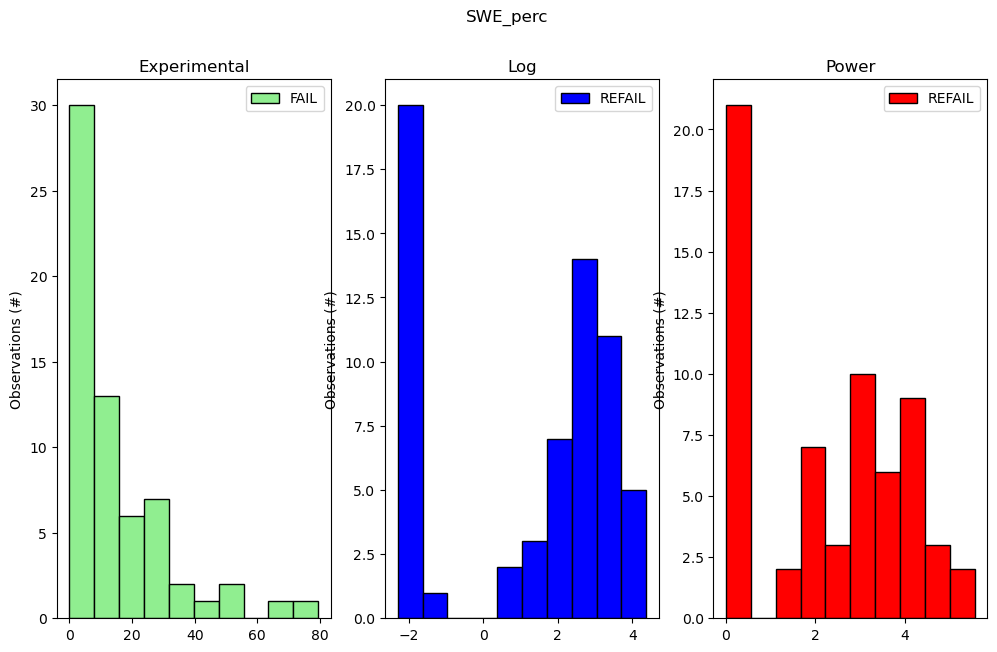

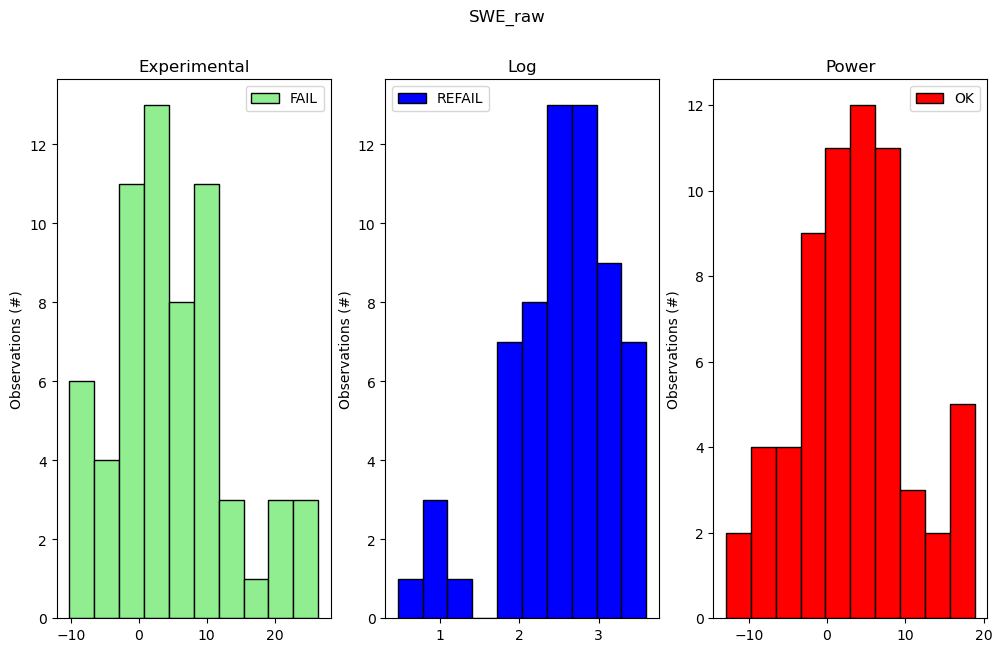

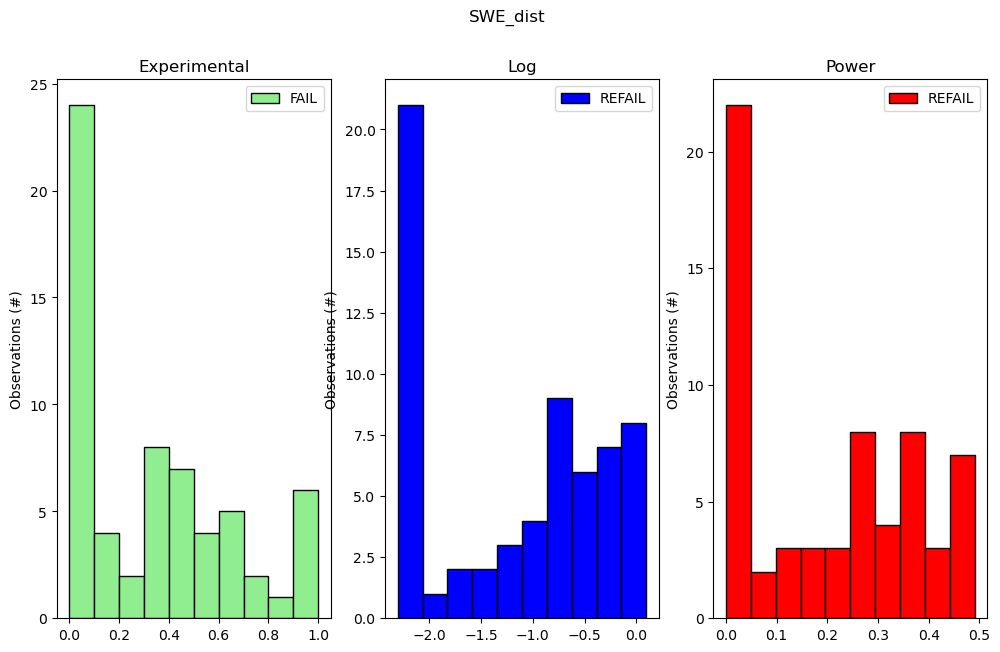

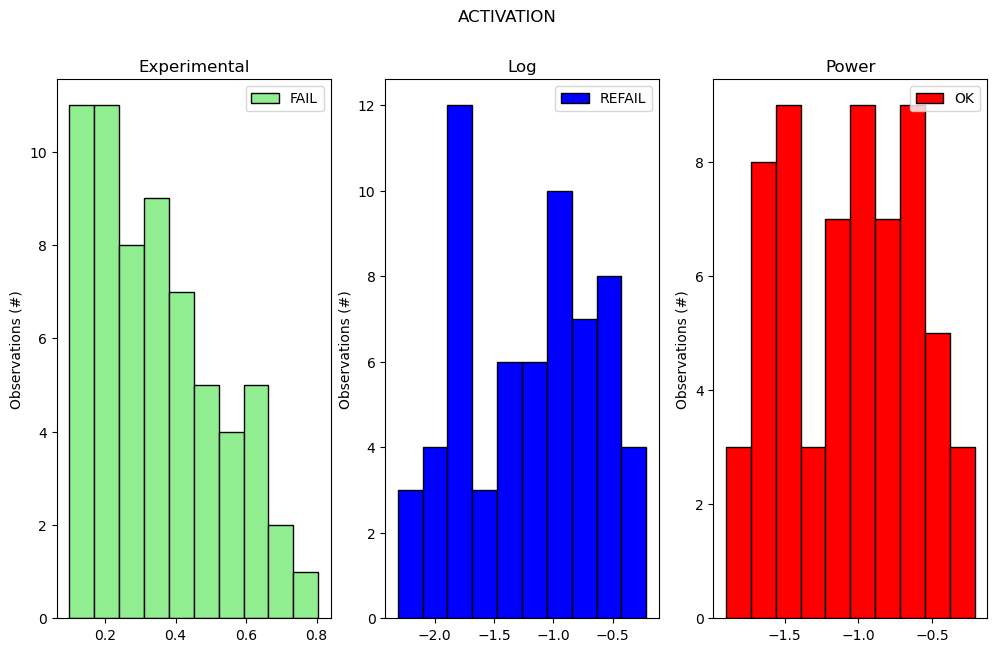

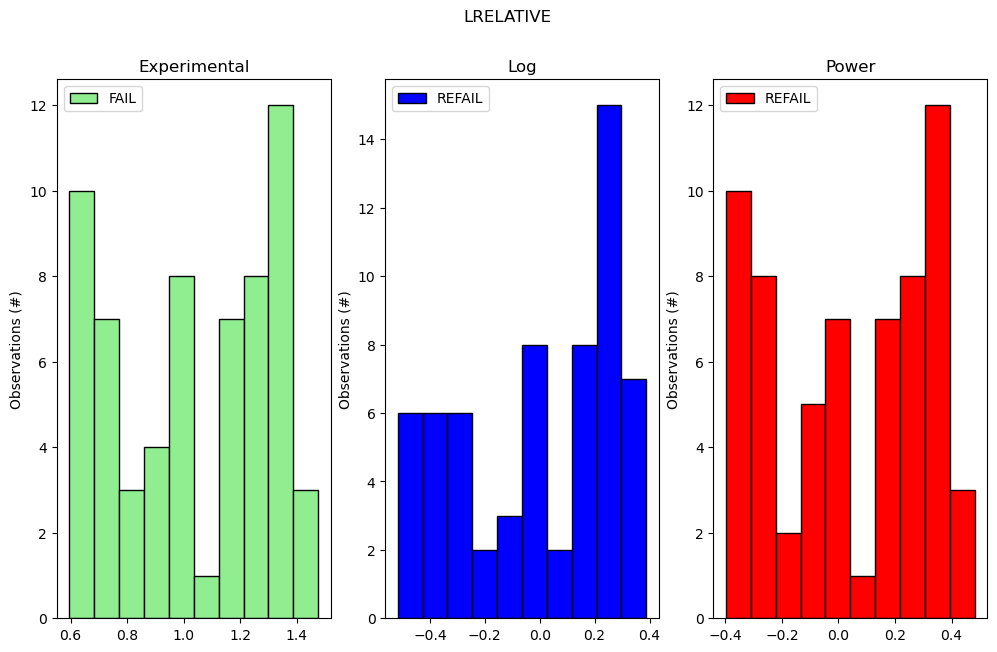

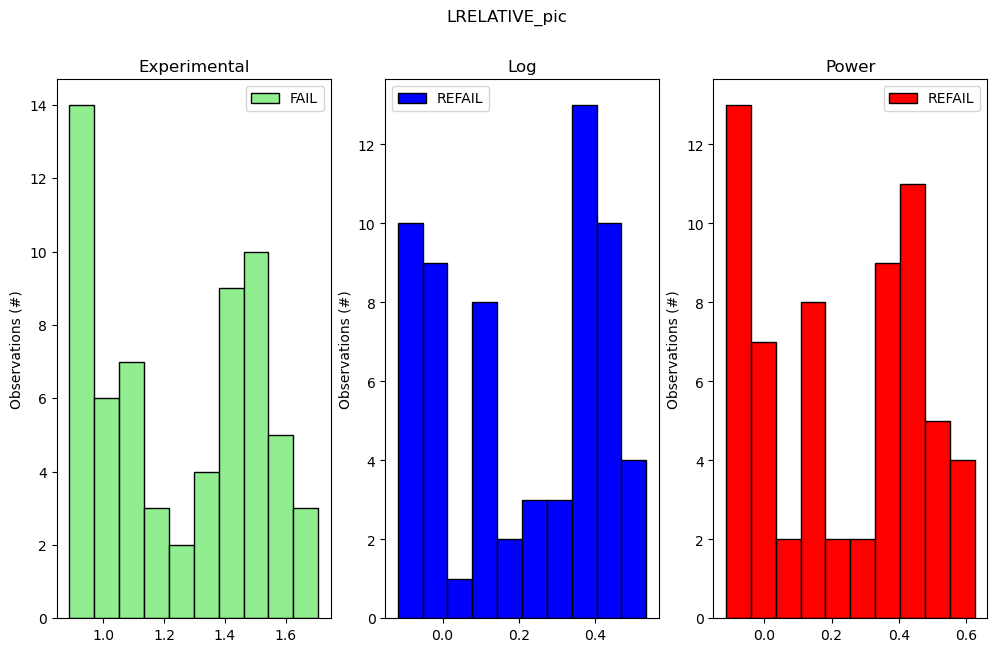

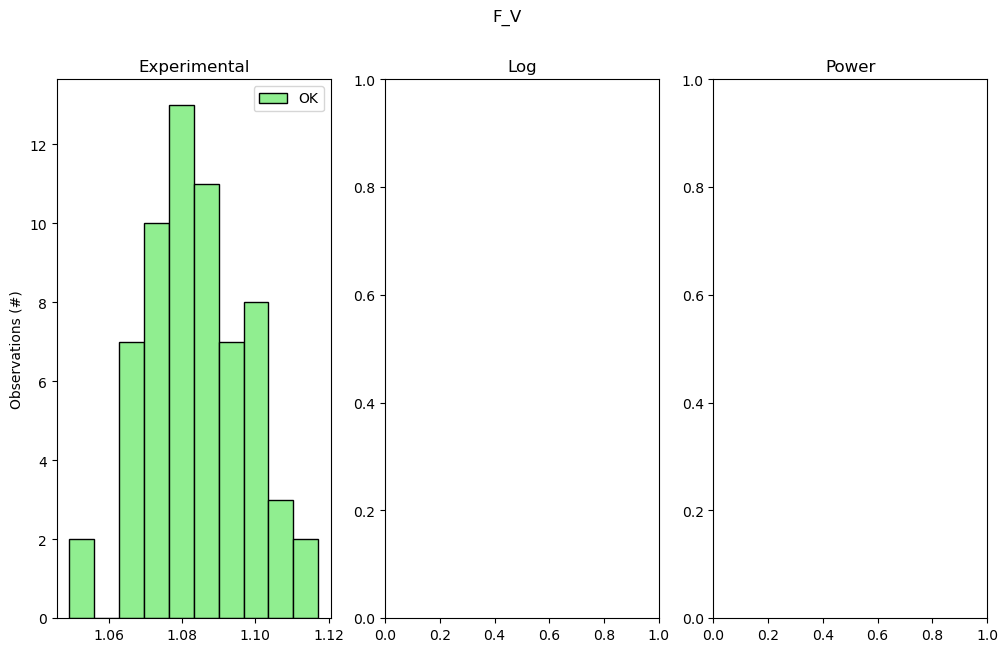

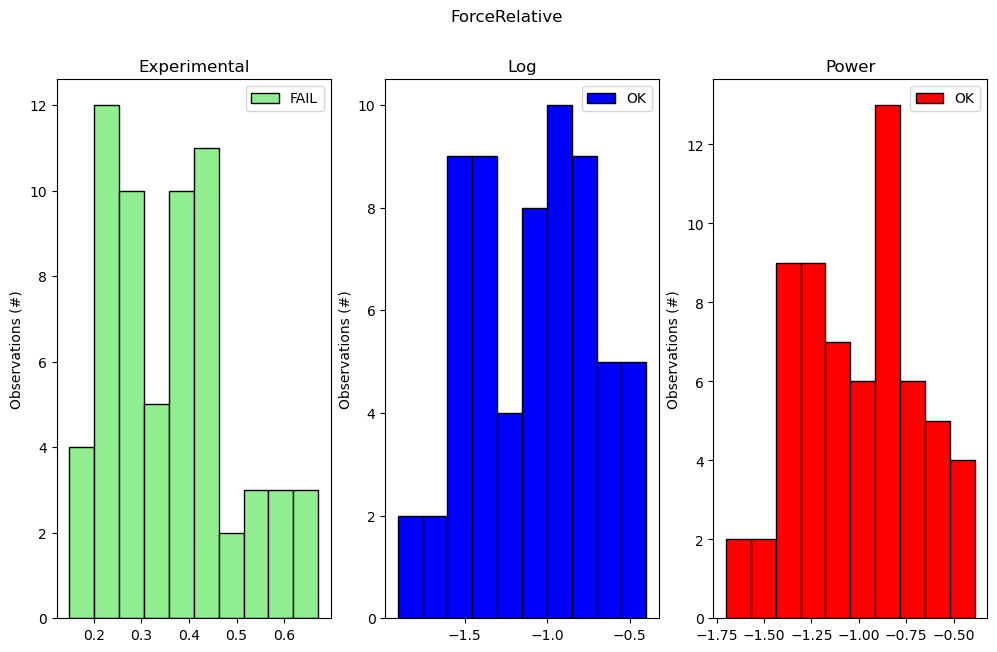

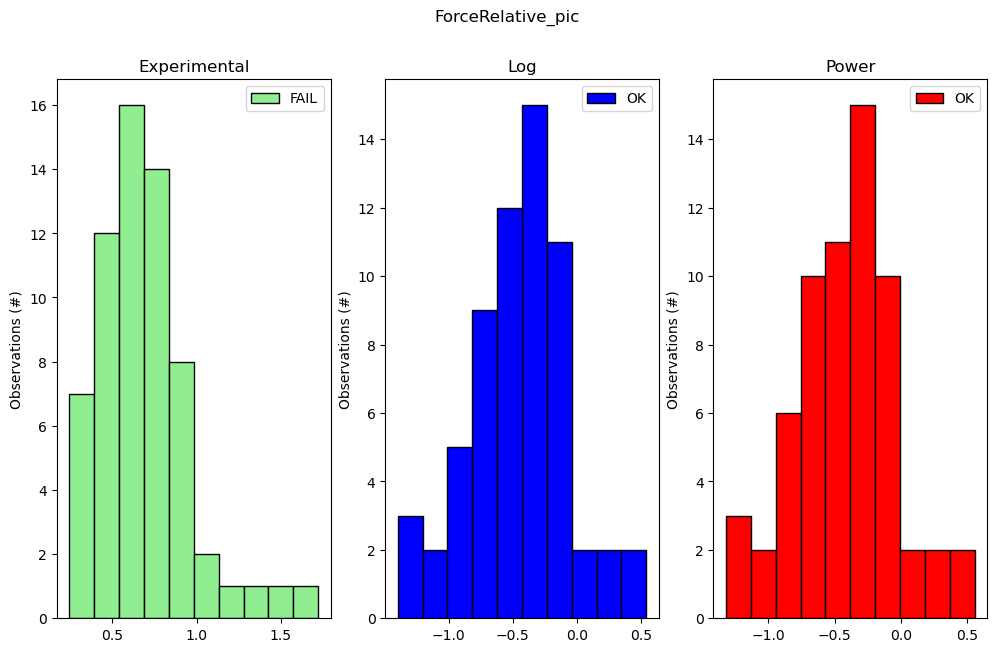

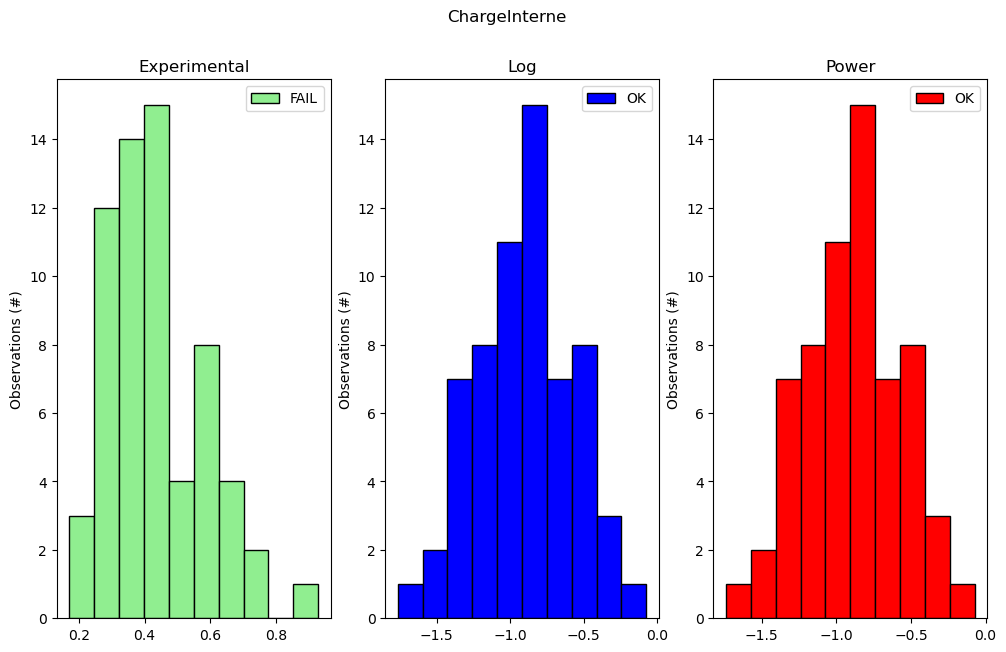

In [2]:
########################################
# Check Normality && Transform
########################################

from colorama import Fore, Back, Style
import numpy as np
import matplotlib .pyplot as plt
from scipy.stats import shapiro, pearsonr, linregress
from sklearn import preprocessing
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

"""
Shapiro-Wilk test (doc. [1]) is used to test normality for all variables separately,
for the whole dataset at once (62 rows, mixing groups and muscles).
/!\ This should be checked since each subject is represented on 3 different rows. /!\
[1] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

When normality test fails, data are transformed according to both log transform and power transform [2] and retesed.
[2] https://scikit-learn.org/stable/modules/preprocessing.html
"""

#Create independant copies of dataframes for data transforming purpose
dftrans = df.copy()
#create a list of column for which normality has to be tested
cols = df.drop(['ID', 'GROUPE', 'MUSCLE'], axis=1).columns.tolist()

#Print header for results
print(f'{"VARIABLE":^20} {"TRANS. METHOD":^12} {"RESULT":^12} STATISTICS')

#Enumerate all columns to test, perform Shapiro test and Plot data & transformed data if any.
for i, c in enumerate(cols):
    #prepare figure
    fig, axs = plt.subplots(1, 3)#use 3 columns to show experimental data, Log transformed and Power transformed data
    fig.suptitle(c)
    color = ['lightgreen', 'blue', 'red']
    #get the variable to test in initial dataframes
    y = df[c]
    #perform shapiro wilk test on whole exercise only
    stat, p = shapiro(y)
    #check result and process accordingly
    trans = 'None'
    if p > .05:
        norm = "OK"
        #show results
        print(f'{c:>18} {trans:>12}', end="")
        print(Back.GREEN + f'{norm:^12} stat={stat:.3f}, p={p:.3f}', end="")
        print(Style.RESET_ALL)
        line = f'{norm}'
        #define output variable identical to input
        yp = y
    else:
        norm = "FAIL"
        #show results
        print(f'{c:>18} {trans:>12}', end="")
        print(Back.RED + f'{norm:^12} stat={stat:.3f}, p={p:.3f}', end="")
        print(Style.RESET_ALL)
        line = f'{norm}'
        #then transform data using different ways
        k = 1;
        while True:
            if k > 2:
                break
            if k == 1:
                #make sure to handle only positive values since log of negative fails
                if np.any(y <= 0):
                    #if so, first shift all values to a constant value so that all data are >= 0 and log them
                    trans = 'Shift+Log'
                    yp = np.array(np.log(y + abs(np.min(y) + .1)))      #shifted log transform
                else:
                    trans = 'Log'
                    yp = np.array(np.log(y))      #only log transform
                #replace inf value (if any zero value)
                yp[np.where(np.isinf(yp))] = 0
            elif k == 2:
                try:
                    # Parametric Power Transform that only accept positive values
                    trans = 'box-cox'
                    pt = preprocessing.PowerTransformer(method=trans, standardize=False)
                    yp = pt.fit_transform(np.array(y).reshape(-1, 1))
                except:
                    # Parametric Power Transform
                    trans = 'yeo-johnson'
                    pt = preprocessing.PowerTransformer(method=trans, standardize=False)
                    yp = pt.fit_transform(np.array(y).reshape(-1, 1))
                #reshape
                yp = yp.reshape(1, -1)[0]
            #Retest normality with tranformed data
            stat, p = shapiro(yp)
            #show result
            print(f'{c:>18} {trans:>12}', end="")
            if p > 0.05:
                print(Fore.GREEN + f'{"OK":^12} stat.={stat:.3f}, p={p:.3f}')
            else:
                print(Fore.RED + f'{"REFAIL":^12} stat.={stat:.3f}, p={p:.3f}')
            print(Style.RESET_ALL)
            line2 = f'{"OK" if p > 0.05 else "REFAIL"}'
            #show modifyed data
            axs[k].hist(yp,
                        bins=10,
                        color=color[k],
                        ec='black',
                        label=line2)
            axs[k].set_ylabel('Observations (#)')
            axs[k].legend(facecolor='white')
            #increment
            k += 1
    #modify in transformad dataframes
    dftrans[c] = pd.Series(yp)
    #plot raw data
    axs[0].hist(y,
                bins=10,
                color=color[0],
                ec='black',
                label=line)
    axs[0].set_ylabel('Observations (#)')
    axs[0].legend(facecolor='white')
    axs[0].set_title('Experimental')
    axs[2].set_title('Power')
    axs[1].set_title('Log')


In [3]:
"""
As a result, Experimental data for F-V was the only variable normally distributed at first.

For the remaining variables, power data transformation was used since this method showed better results than log transform.

For SWE variables, only SWE_raw (absolute diff between PRE & POST tests) passed the test and it was kept as dependent variable for regressions.
Neither SWE_perc (absolute changes PRE-POST) nore SWE_dist (distribution of SWE among hamstring) passed the test and were discarded.

/!\ Both LRELATIVE and LRELATIVE_pic failed the test. These are kept for now but performing linear regresion with these variables may introduce a bias. /!\
"""
dftrans = dftrans.drop(['SWE_perc', 'SWE_dist'], axis=1)
print('Dataframe to work with after data transform step')
dftrans

Dataframe to work with after data transform step


,ID,GROUPE,MUSCLE,SWE_raw,ACTIVATION,LRELATIVE,LRELATIVE_pic,F_V,ForceRelative,ForceRelative_pic,ChargeInterne
0,1,NHE,SM,-0.100684,-0.900383,-0.370085,-0.044055,1.081885,-1.212508,-0.720422,-1.277381
1,2,NHE,SM,1.827406,-0.498714,-0.382411,-0.098088,1.094521,-0.840668,-0.403237,-0.866622
2,3,NHE,SM,-1.503155,-0.817412,-0.321584,0.016412,1.087489,-1.011799,-0.270724,-1.017720
3,4,NHE,SM,-9.328965,-0.786909,-0.366278,-0.054059,1.086391,-1.063979,-0.451479,-1.080134
4,5,NHE,SM,-9.328965,-0.713463,-0.278460,-0.058829,1.063180,-0.905514,-0.291631,-0.904941
...,...,...,...,...,...,...,...,...,...,...,...
58,17,DL,BF,7.899572,-1.458101,0.324064,0.496406,1.095586,-1.209855,-0.455920,-0.306224
59,18,DL,BF,-2.783162,-0.619454,0.132588,0.343872,1.076104,-0.411576,-0.208711,-0.579398
60,19,DL,BF,5.334027,-1.037944,0.250907,0.433182,1.078565,-0.790330,-0.482348,-0.839470
61,20,DL,BF,7.180320,-1.160101,0.205570,0.395738,1.085441,-0.963011,-0.663162,-0.957131


In [4]:
##############################
# For information > Normality by dividing dataset on both MUSCLE & GROUP
##############################

"""
In case it would be better to check data normality on categorized dat (divided by muscle & group),
then normality data are also performed on sub-datasets.
"""

lst_muscle = np.unique(df.MUSCLE)
lst_group = np.unique(df.GROUPE)
for c in cols:
    for g in lst_group:
        for m in lst_muscle:
            y = df[(df['MUSCLE'] == m) & (df['GROUPE'] == g)][c]
            #perform shapiro wilk test on whole exercise only
            stat, p = shapiro(y)
            #show results
            print(f'{c:>18}: {m}*{g}', end="")
            if p > 0.05:
                print(Fore.GREEN + f'{"OK":^8} stat.={stat:.3f}, p={p:.3f}, N={len(y)}')
            else:
                print(Fore.RED + f'{"FAIL":^8} stat.={stat:.3f}, p={p:.3f}, N={len(y)}')
            print(Style.RESET_ALL)

          SWE_perc: BF*DL   OK    stat.=0.889, p=0.134, N=11

          SWE_perc: SM*DL   OK    stat.=0.906, p=0.216, N=11

          SWE_perc: ST*DL  FAIL   stat.=0.572, p=0.000, N=11

          SWE_perc: BF*NHE   OK    stat.=0.866, p=0.090, N=10

          SWE_perc: SM*NHE  FAIL   stat.=0.623, p=0.000, N=10

          SWE_perc: ST*NHE   OK    stat.=0.883, p=0.140, N=10

           SWE_raw: BF*DL  FAIL   stat.=0.819, p=0.016, N=11

           SWE_raw: SM*DL   OK    stat.=0.907, p=0.225, N=11

           SWE_raw: ST*DL   OK    stat.=0.971, p=0.898, N=11

           SWE_raw: BF*NHE   OK    stat.=0.914, p=0.313, N=10

           SWE_raw: SM*NHE   OK    stat.=0.863, p=0.082, N=10

           SWE_raw: ST*NHE   OK    stat.=0.904, p=0.240, N=10

          SWE_dist: BF*DL   OK    stat.=0.870, p=0.077, N=11

          SWE_dist: SM*DL   OK    stat.=0.880, p=0.104, N=11

          SWE_dist: ST*DL  FAIL   stat.=0.580, p=0.000, N=11

          SWE_dist: BF*NHE   OK    stat.=0.909, p=0.276, N=10

 

        ACTIVATION r=0.01, p=0.954

        ACTIVATION DL r=0.22, p=0.226

        ACTIVATION: DLxBF r=-0.29, p=0.379

        ACTIVATION: DLxST r=-0.53, p=0.092

        ACTIVATION: DLxSM r=0.12, p=0.732

        ACTIVATION NHE r=-0.19, p=0.327

        ACTIVATION: NHExBF r=-0.56, p=0.095

        ACTIVATION: NHExST r=-0.10, p=0.784

        ACTIVATION: NHExSM r=0.25, p=0.490

        ACTIVATION BF r=-0.56, p=0.008

        ACTIVATION ST r=0.61, p=0.003

        ACTIVATION SM r=-0.23, p=0.314



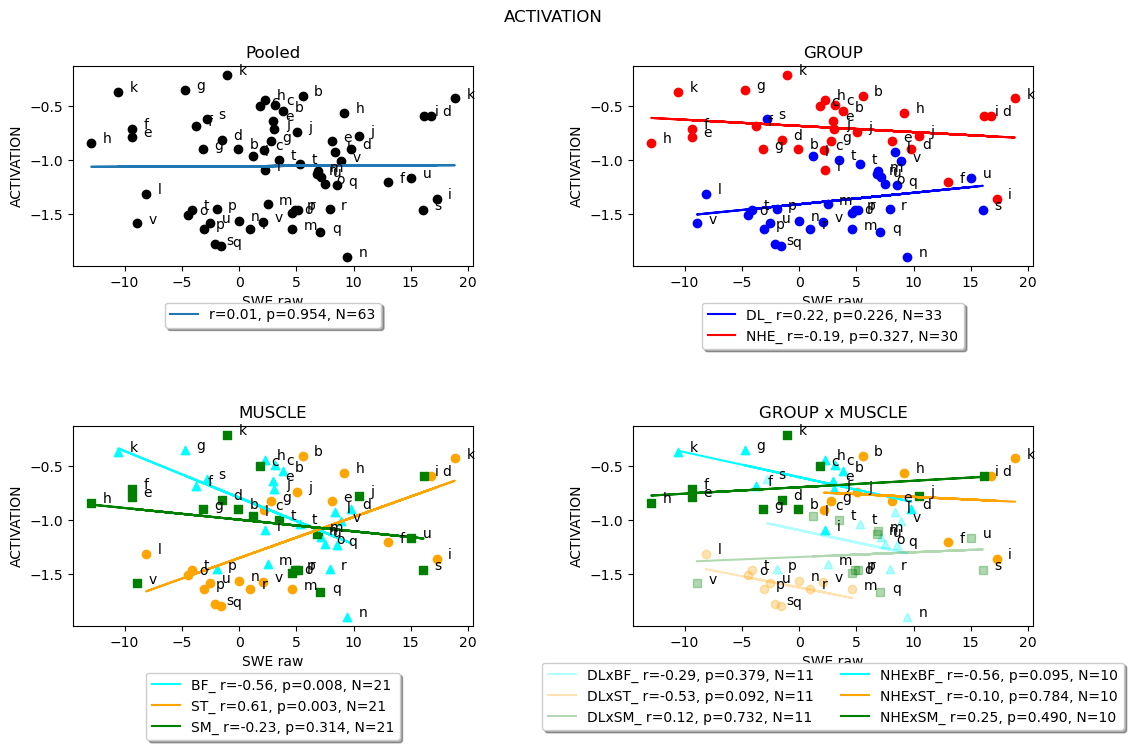

         LRELATIVE r=0.12, p=0.354

         LRELATIVE DL r=-0.04, p=0.815

         LRELATIVE: DLxBF r=0.26, p=0.439

         LRELATIVE: DLxST r=0.51, p=0.111

         LRELATIVE: DLxSM r=-0.25, p=0.454

         LRELATIVE NHE r=0.49, p=0.005

         LRELATIVE: NHExBF r=-0.33, p=0.351

         LRELATIVE: NHExST r=0.13, p=0.728

         LRELATIVE: NHExSM r=-0.21, p=0.551

         LRELATIVE BF r=0.44, p=0.049

         LRELATIVE ST r=-0.66, p=0.001

         LRELATIVE SM r=0.32, p=0.155



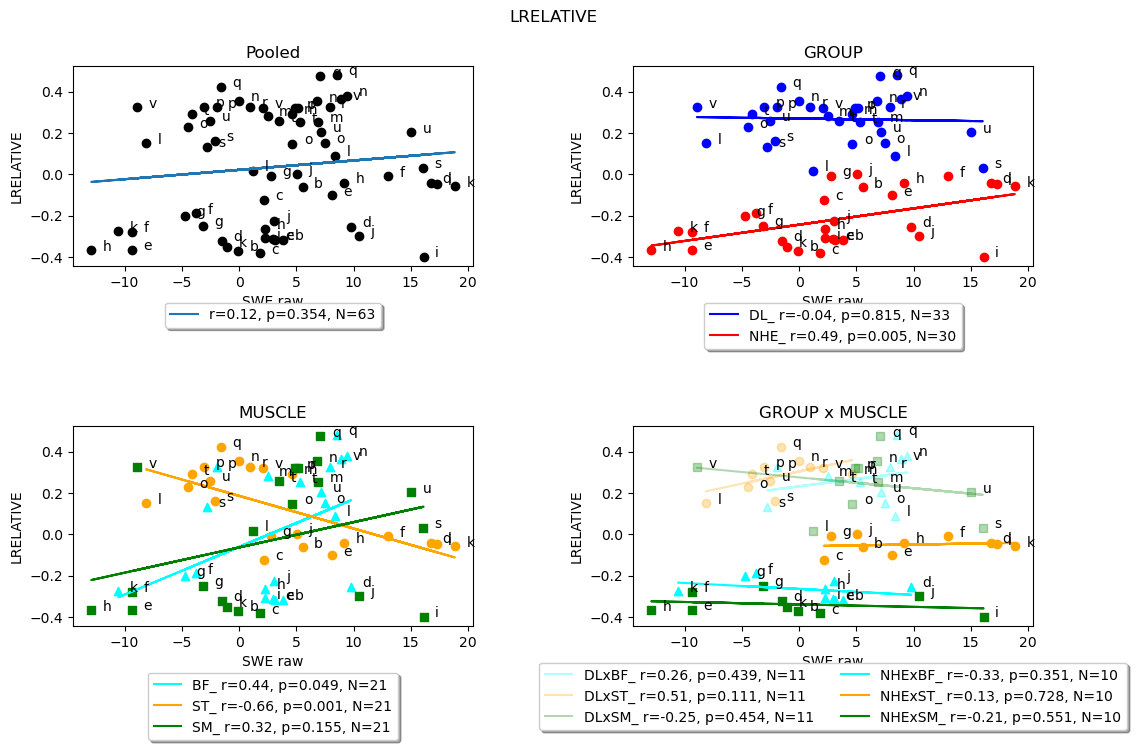

     LRELATIVE_pic r=0.14, p=0.278

     LRELATIVE_pic DL r=0.24, p=0.176

     LRELATIVE_pic: DLxBF r=0.42, p=0.201

     LRELATIVE_pic: DLxST r=0.35, p=0.296

     LRELATIVE_pic: DLxSM r=-0.26, p=0.435

     LRELATIVE_pic NHE r=0.48, p=0.007

     LRELATIVE_pic: NHExBF r=-0.47, p=0.172

     LRELATIVE_pic: NHExST r=0.28, p=0.428

     LRELATIVE_pic: NHExSM r=-0.14, p=0.706

     LRELATIVE_pic BF r=0.45, p=0.040

     LRELATIVE_pic ST r=-0.67, p=0.001

     LRELATIVE_pic SM r=0.33, p=0.143



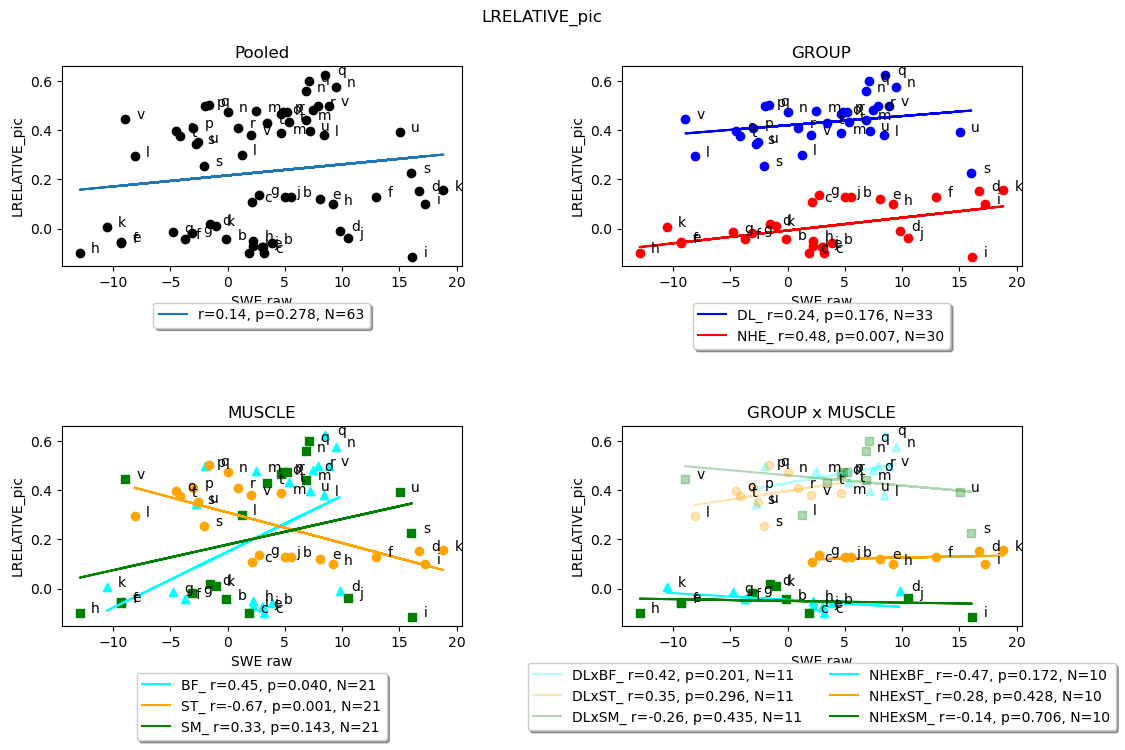

               F_V r=0.14, p=0.286

               F_V DL r=-0.06, p=0.754

               F_V: DLxBF r=0.22, p=0.519

               F_V: DLxST r=-0.13, p=0.702

               F_V: DLxSM r=0.13, p=0.714

               F_V NHE r=0.34, p=0.070

               F_V: NHExBF r=0.64, p=0.048

               F_V: NHExST r=-0.23, p=0.526

               F_V: NHExSM r=0.26, p=0.467

               F_V BF r=0.57, p=0.007

               F_V ST r=-0.40, p=0.076

               F_V SM r=0.21, p=0.352



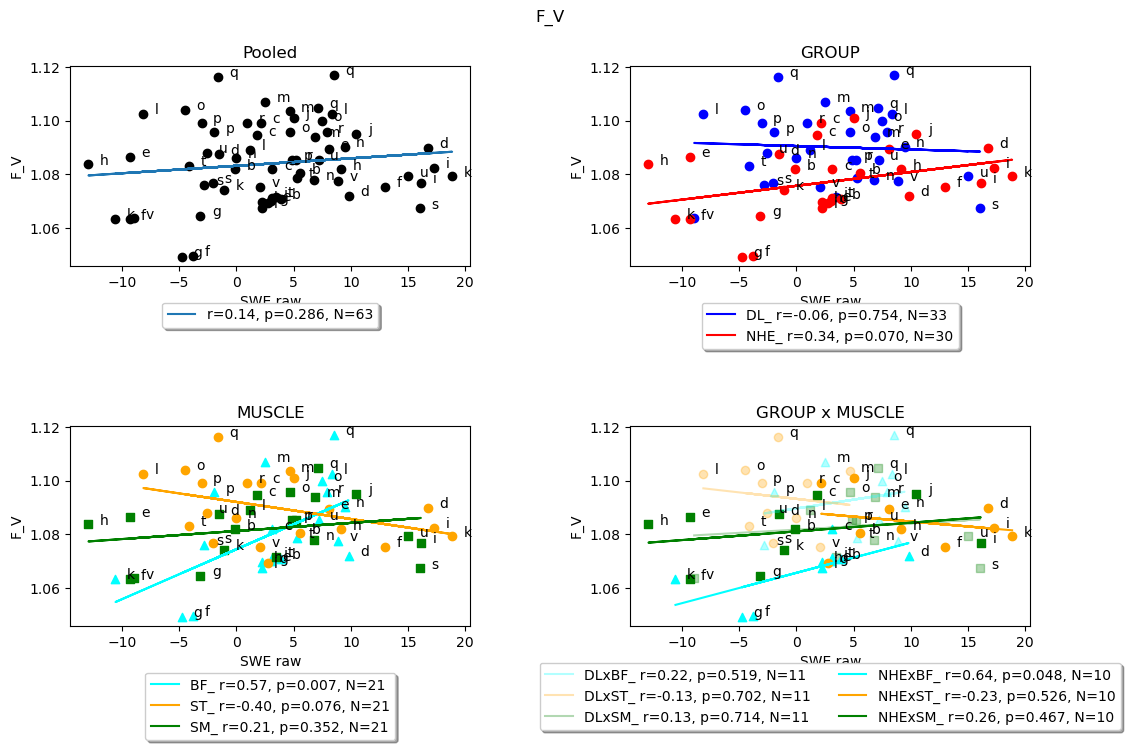

     ForceRelative r=0.12, p=0.367

     ForceRelative DL r=0.21, p=0.243

     ForceRelative: DLxBF r=-0.26, p=0.446

     ForceRelative: DLxST r=-0.41, p=0.207

     ForceRelative: DLxSM r=-0.01, p=0.978

     ForceRelative NHE r=0.06, p=0.737

     ForceRelative: NHExBF r=-0.56, p=0.095

     ForceRelative: NHExST r=-0.12, p=0.732

     ForceRelative: NHExSM r=0.21, p=0.553

     ForceRelative BF r=-0.45, p=0.040

     ForceRelative ST r=0.55, p=0.011

     ForceRelative SM r=-0.06, p=0.809



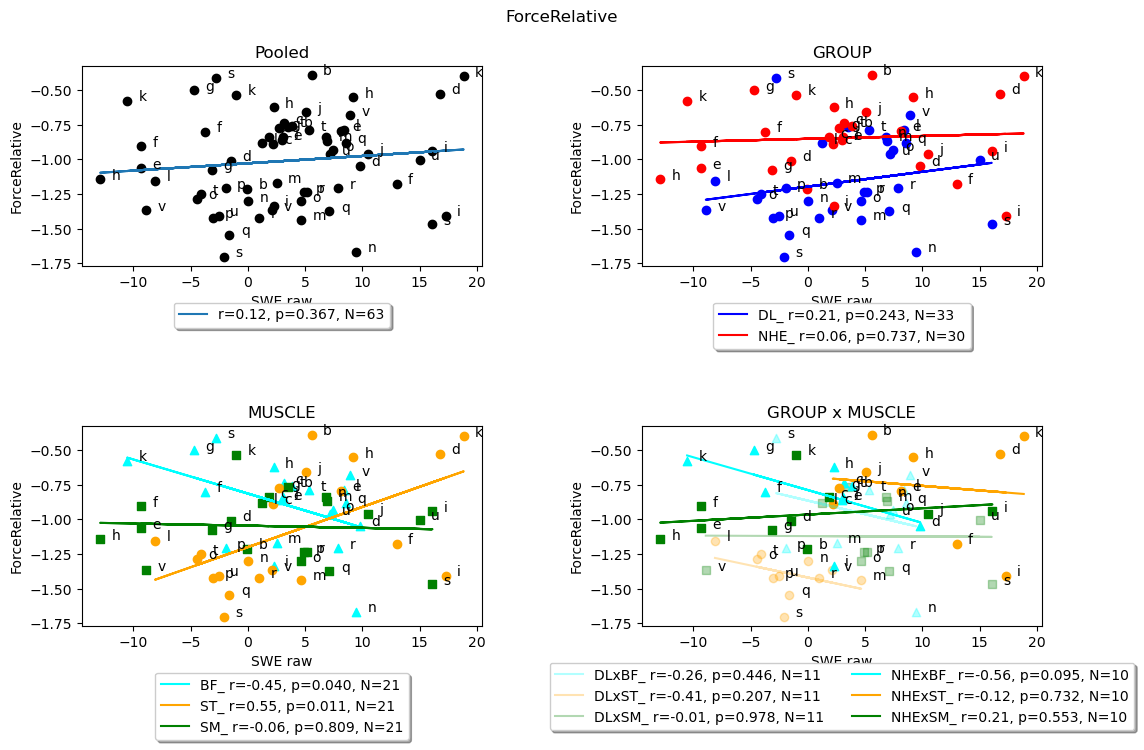

 ForceRelative_pic r=0.11, p=0.393

 ForceRelative_pic DL r=0.29, p=0.101

 ForceRelative_pic: DLxBF r=0.25, p=0.452

 ForceRelative_pic: DLxST r=0.11, p=0.753

 ForceRelative_pic: DLxSM r=-0.22, p=0.516

 ForceRelative_pic NHE r=-0.10, p=0.596

 ForceRelative_pic: NHExBF r=-0.35, p=0.324

 ForceRelative_pic: NHExST r=-0.05, p=0.892

 ForceRelative_pic: NHExSM r=0.23, p=0.529

 ForceRelative_pic BF r=0.04, p=0.877

 ForceRelative_pic ST r=0.41, p=0.064

 ForceRelative_pic SM r=-0.08, p=0.720



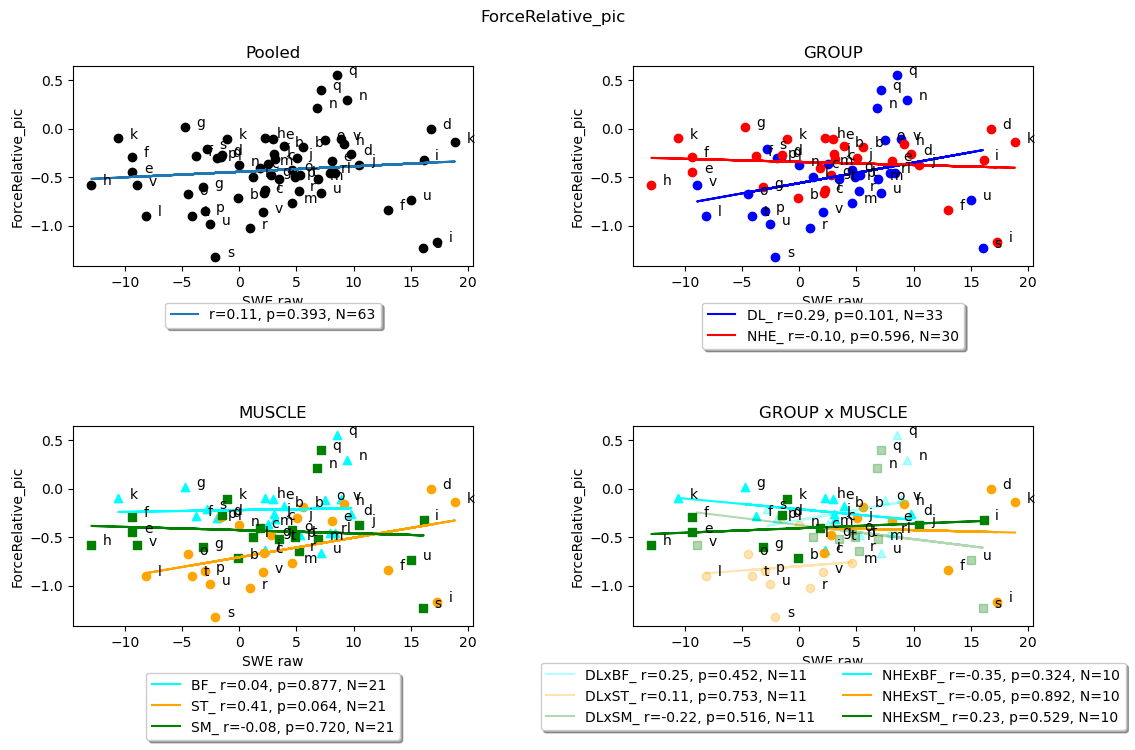

     ChargeInterne r=0.17, p=0.175

     ChargeInterne DL r=0.36, p=0.037

     ChargeInterne: DLxBF r=0.29, p=0.391

     ChargeInterne: DLxST r=0.23, p=0.495

     ChargeInterne: DLxSM r=-0.08, p=0.825

     ChargeInterne NHE r=-0.01, p=0.973

     ChargeInterne: NHExBF r=-0.55, p=0.103

     ChargeInterne: NHExST r=-0.12, p=0.740

     ChargeInterne: NHExSM r=0.21, p=0.565

     ChargeInterne BF r=-0.05, p=0.823

     ChargeInterne ST r=0.41, p=0.064

     ChargeInterne SM r=0.11, p=0.632



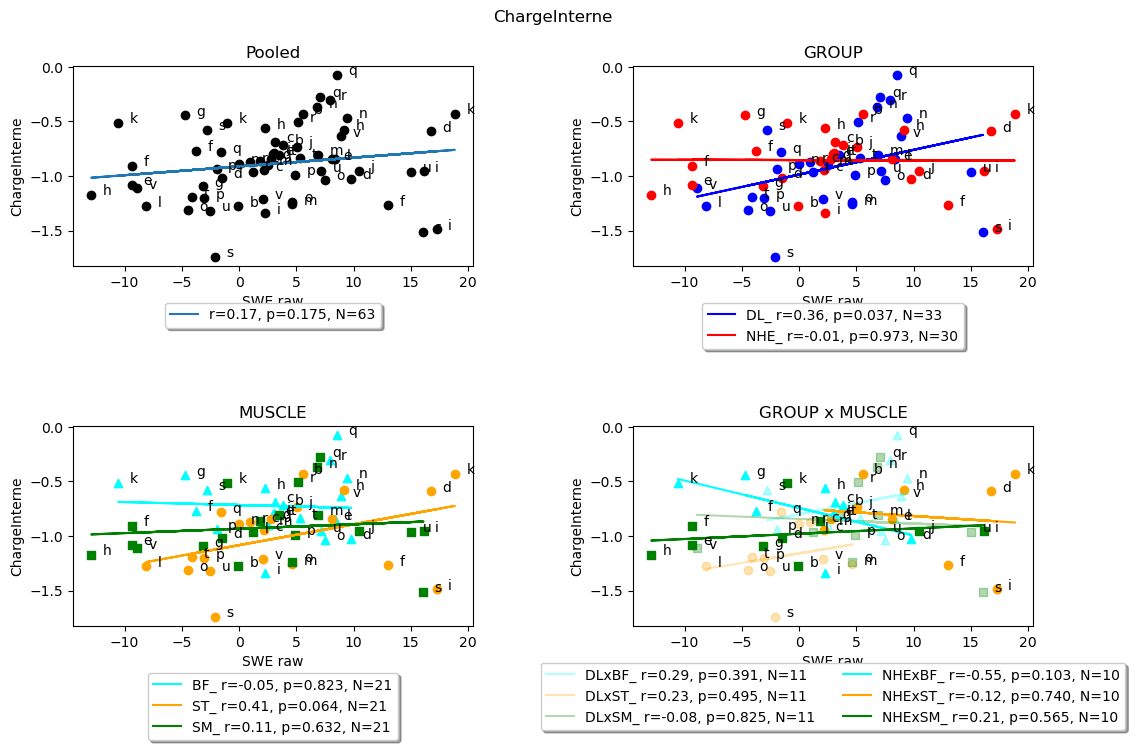

In [5]:
#####################################
# Separate linear regression
#####################################

"""
Separate linear regression can now be performed with transformed data using
the only SWE variable that was normally distributed "SWE_raw" (absolute diff between PRE & POST tests)
as independent variable and all other (including LRELATIVE which is not normal) as dependent variables.

/!\ If we want to perform regression on experimental data, edit "base_df" variable from 'dftrans' to 'df'

"""
#get a working dataframe
base_df = dftrans.copy()
#Add some variable dor visualization purpose
base_df['Marker'] = df['MUSCLE'].replace('SM', 's').replace('ST', 'o').replace('BF', '^')
base_df['Color'] = df['GROUPE'].replace('NHE', 'red').replace('DL', 'blue')

col = 0
row = 0
#define independent variable
indep = 'SWE_raw'
#get colnames of dependent variables
cols = list(base_df.drop(['ID', 'GROUPE', 'MUSCLE', 'Marker', 'Color', indep], axis=1).columns)
#loop them
for c in cols:
    #create a figure at each column
    fig, axs = plt.subplots(2, 2) #all, group, muscle, interact
    fig.suptitle(c)
    #proceed for all data
    x = np.array(base_df[indep])
    y = np.array(base_df[c])
    #all in one for linear regression
    result = linregress(x, y)
    #show results
    print(f'{c:>18}', end="")
    if result.pvalue < 0.05:
        print(Fore.GREEN + f' r={result.rvalue:.2f}, p={result.pvalue:.3f}')
    elif result.pvalue < 0.1:
        print(Fore.YELLOW + f' r={result.rvalue:.2f}, p={result.pvalue:.3f}')
    else:
        print(Fore.RED + f' r={result.rvalue:.2f}, p={result.pvalue:.3f}')
    print(Style.RESET_ALL)
    #draw
    line = f'r={result.rvalue:.2f}, p={result.pvalue:.3f}, N={len(x)}'
    axs[0, 0].scatter(x, y, marker='o', c='#000')
    axs[0, 0].plot(x, result.intercept + result.slope * x, label=line)
    axs[0, 0].set_title('Pooled')
    axs[0, 0].set_ylabel(c)
    axs[0, 0].set_xlabel('SWE raw')
    axs[0, 0].legend(facecolor='white', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
    for i, txt in enumerate(base_df['ID']):
        axs[0, 0].annotate(chr(int(txt) + 97), (x[i]+1, y[i]))
    #Then proceed for sub groups (level 2)
    for gr, sub in base_df.groupby('Color'):
        x = np.array(sub[indep])
        y = np.array(sub[c])
        result = linregress(x, y)
        #show results
        print(f'{c:>18} {sub.GROUPE.iloc[0]}', end="")
        if result.pvalue < 0.05:
            print(Fore.GREEN + f' r={result.rvalue:.2f}, p={result.pvalue:.3f}')
        elif result.pvalue < 0.1:
            print(Fore.YELLOW + f' r={result.rvalue:.2f}, p={result.pvalue:.3f}')
        else:
            print(Fore.RED + f' r={result.rvalue:.2f}, p={result.pvalue:.3f}')
        print(Style.RESET_ALL)
        #draw
        line = f'{sub.GROUPE.iloc[0]}_ r={result.rvalue:.2f}, p={result.pvalue:.3f}, N={len(x)}'
        axs[0, 1].scatter(x, y, marker='o', c=gr)
        axs[0, 1].plot(x, result.intercept + result.slope * x, color=gr, label=line)
        for i, txt in enumerate(sub['ID']):
            axs[0, 1].annotate(chr(int(txt) + 97), (x[i]+1, y[i]))
        #interaction group & muscles (level 3)
        for mu, sub2 in sub.groupby('Marker'):
            x = np.array(sub2[indep])
            y = np.array(sub2[c])
            result = linregress(x, y)
            #show results
            print(f'{c:>18}: {sub2.GROUPE.iloc[0]}x{sub2.MUSCLE.iloc[0]}', end="")
            if result.pvalue < 0.05:
                print(Fore.GREEN + f' r={result.rvalue:.2f}, p={result.pvalue:.3f}')
            elif result.pvalue < 0.1:
                print(Fore.YELLOW + f' r={result.rvalue:.2f}, p={result.pvalue:.3f}')
            else:
                print(Fore.RED + f' r={result.rvalue:.2f}, p={result.pvalue:.3f}')
            print(Style.RESET_ALL)
            #define a color based on marker
            if mu == 's': color = 'green'
            elif mu == 'o': color = 'orange'
            elif mu == '^': color = 'cyan'
            if gr == 'red':
                alpha=1
            elif  gr == 'blue':
                alpha= .3
            #draw
            line = f'{sub2.GROUPE.iloc[0]}x{sub2.MUSCLE.iloc[0]}_ r={result.rvalue:.2f}, p={result.pvalue:.3f}, N={len(x)}'
            axs[1, 1].scatter(x, y, marker=mu, c=color, alpha=alpha)
            axs[1, 1].plot(x, result.intercept + result.slope * x, color=color, alpha=alpha, label=line)
            for i, txt in enumerate(sub2['ID']):
                axs[1, 1].annotate(chr(int(txt) + 97), (x[i]+1, y[i]))
        axs[0, 1].set_title('GROUP')
        axs[0, 1].set_ylabel(c)
        axs[0, 1].set_xlabel('SWE raw')
        axs[0, 1].legend(facecolor='white', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
        axs[1, 1].set_title('GROUP x MUSCLE')
        axs[1, 1].set_ylabel(c)
        axs[1, 1].set_xlabel('SWE raw')
        axs[1, 1].legend(facecolor='white', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
    #now for sub muscles (level 2)
    for mu, sub in base_df.groupby('Marker'):
        x = np.array(sub[indep])
        y = np.array(sub[c])
        result = linregress(x, y)
        #show results
        print(f'{c:>18} {sub.MUSCLE.iloc[0]}', end="")
        if result.pvalue < 0.05:
            print(Fore.GREEN + f' r={result.rvalue:.2f}, p={result.pvalue:.3f}')
        elif result.pvalue < 0.1:
            print(Fore.YELLOW + f' r={result.rvalue:.2f}, p={result.pvalue:.3f}')
        else:
            print(Fore.RED + f' r={result.rvalue:.2f}, p={result.pvalue:.3f}')
        print(Style.RESET_ALL)
        #define a color based on marker
        if mu == 's': color = 'green'
        elif mu == 'o': color = 'orange'
        elif mu == '^': color = 'cyan'
        #draw
        line = f'{sub.MUSCLE.iloc[0]}_ r={result.rvalue:.2f}, p={result.pvalue:.3f}, N={len(x)}'
        axs[1, 0].scatter(x, y, marker=mu, c=color)
        axs[1, 0].plot(x, result.intercept + result.slope * x, color=color, label=line)
        for i, txt in enumerate(sub['ID']):
            axs[1, 0].annotate(chr(int(txt) + 97), (x[i]+1, y[i]))
    axs[1, 0].set_title('MUSCLE')
    axs[1, 0].set_ylabel(c)
    axs[1, 0].set_xlabel('SWE raw')
    axs[1, 0].legend(facecolor='white', loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.8)
    plt.show()



In [6]:
"""
As a result 
"""

'\nAs a result \n'

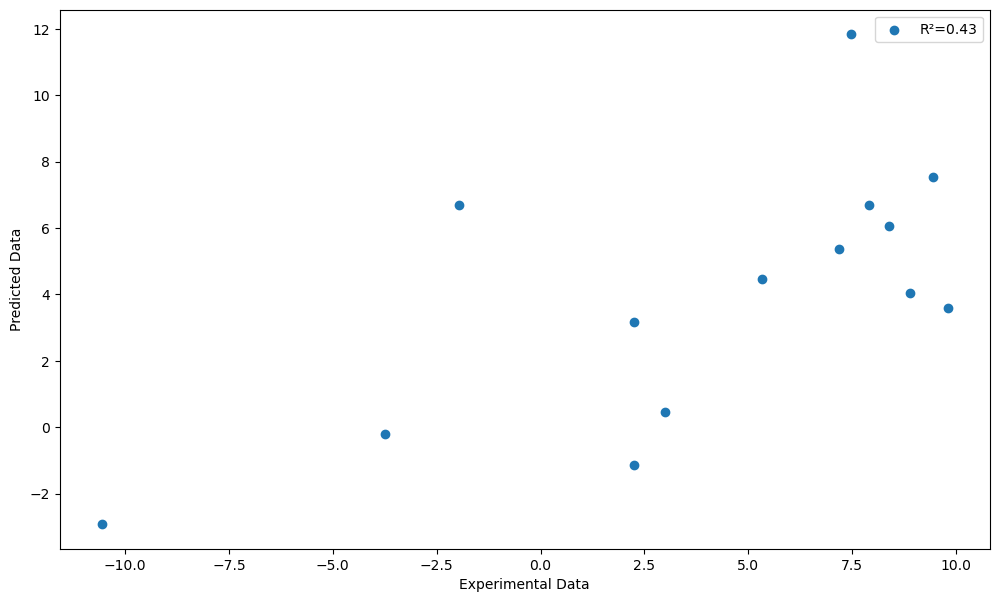

In [7]:
#########################
# Multiple Linear Regression
########################
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

"""

"""
#set a working dataframe
base_df = dftrans.copy()

#Filter for BF muscle since it has good results
base_df = base_df[base_df['MUSCLE'] == 'BF']

#create dependent variable dataframe
X = base_df[['ACTIVATION', 'LRELATIVE', 'F_V', 'ForceRelative']]
#get Independent variable
y = base_df['SWE_raw']

#Split the pool to get 70% Train data & 30% Test Data (shuffled)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Fit a linear model using train data
lr = LinearRegression()
lr.fit(X_train, y_train)
#get the predicted data from training
y_pred_train = lr.predict(X_train)
r2 = r2_score(y_train, y_pred_train)

#Represent predictivedata against actual data (from training pool) for validation
plt.scatter(y_train, y_pred_train, label=f'R²={r2:.2f}')
#plt.plot(y_train, lr.intercept_ + lr.coef_ * y_train, label=line)
plt.xlabel('Experimental Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.show()
